# Medchem Rules

Medchem rules can be useful to quickly flag or triage compounds that do not meet certain basic molecular properties criteria (such as MW, TSPA, cLogP, etc).

You can find more informations about the rules and their origins within their docstring or in [the API documentation](../api/medchem.rules.html#basic-rules).

The below tutorial will introduce you how to apply those rules to a list of molecules.

In [1]:
%load_ext autoreload
%autoreload 2
    
import datamol as dm
import pandas as pd

import medchem as mc

## Filtering with rules

You can list all the available rules.

In [2]:
mc.rules.RuleFilters.list_available_rules()

,name,rules,description
0,rule_of_five,MW <= 500 & logP <= 5 & HBD <= 5 & HBA <= 10,leadlike;druglike;small molecule;library design
1,rule_of_five_beyond,"MW <= 1000 & logP in [-2, 10] & HBD <= 6 & HBA...",leadlike;druglike;small molecule;library design
2,rule_of_four,MW >= 400 & logP >= 4 & RINGS >=4 & HBA >= 4,PPI inhibitor;druglike
3,rule_of_three,MW <= 300 & logP <= 3 & HBA <= 3 & HBD <= 3 & ...,fragment;building block
4,rule_of_three_extended,"MW <= 300 & logP in [-3, 3] & HBA <= 6 & HBD <...",fragment;building block
5,rule_of_two,MW <= 200 & logP <= 2 & HBA <= 4 & HBD <= 2,fragment;reagent;building block
6,rule_of_ghose,"MW in [160, 480] & logP in [-0.4, 5.6] & Natom...",leadlike;druglike;small molecule;library design
7,rule_of_veber,rotatable bond <= 10 & TPSA < 140,druglike;leadlike;small molecule;oral
8,rule_of_reos,"MW in [200, 500] & logP in [-5, 5] & HBA in [0...",druglike;small molecule;library design;HTS
9,rule_of_chemaxon_druglikeness,MW < 400 & logP < 5 & HBA <= 10 & HBD <= 5 & r...,leadlike;druglike;small molecule


You can also filter the rules using the tags in their descriptions:

In [3]:
mc.rules.RuleFilters.list_available_rules("building block")

,name,rules,description
3,rule_of_three,MW <= 300 & logP <= 3 & HBA <= 3 & HBD <= 3 & ...,fragment;building block
4,rule_of_three_extended,"MW <= 300 & logP in [-3, 3] & HBA <= 6 & HBD <...",fragment;building block
5,rule_of_two,MW <= 200 & logP <= 2 & HBA <= 4 & HBD <= 2,fragment;reagent;building block


Given a list of rules, you can create a `RuleFilters` object in order to filter a list of molecules.

In [4]:
# Create the filter object
rfilter = mc.rules.RuleFilters(
    # You can specifiy a rule as a string or as a callable
    rule_list=["rule_of_five", "rule_of_oprea", "rule_of_cns", "rule_of_leadlike_soft"],
    # You can specify a custom list of names
    rule_list_names=["rule_of_five", "rule_of_oprea", "rule_of_cns", "rule_of_leadlike_soft"],
)

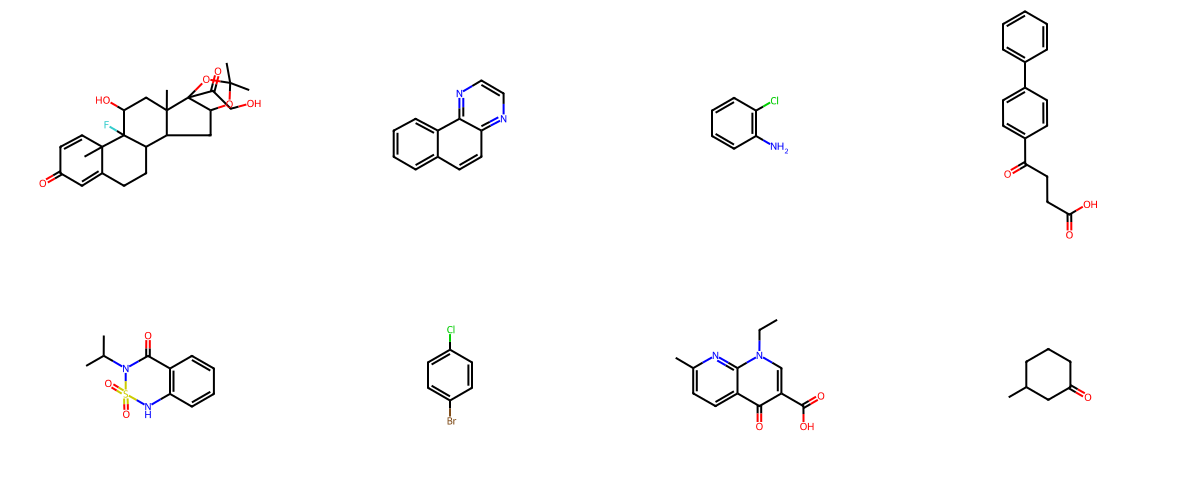

In [7]:
# Load a dataset
data = dm.data.solubility()
data = data.sample(50, random_state=20)

dm.to_image(data.iloc[:8]["mol"].tolist(), mol_size=(300, 250))

Apply our rule filters on the list of molecules.

In [8]:
results = rfilter(
    mols=data["mol"].tolist(),
    n_jobs=-1,
    progress=True,
    progress_leave=True,
    scheduler="auto",
    keep_props=False,
    fail_if_invalid=True,
)

results.head()

Filter by rules:   0%|          | 0/50 [00:00<?, ?it/s]

,mol,pass_all,pass_any,rule_of_five,rule_of_oprea,rule_of_cns,rule_of_leadlike_soft
0,<rdkit.Chem.rdchem.Mol object at 0x7f453a36fa70>,False,True,True,False,False,False
1,<rdkit.Chem.rdchem.Mol object at 0x7f453a382810>,False,True,True,False,True,True
2,<rdkit.Chem.rdchem.Mol object at 0x7f453a375850>,False,True,True,False,False,False
3,<rdkit.Chem.rdchem.Mol object at 0x7f453a373b50>,True,True,True,True,True,True
4,<rdkit.Chem.rdchem.Mol object at 0x7f453a37c350>,False,True,True,False,True,True


You will noticde that the columns `pass_all` and `pass_any` will indicate whether a molecule has passed either all or at least one of the rules.

Display the results.

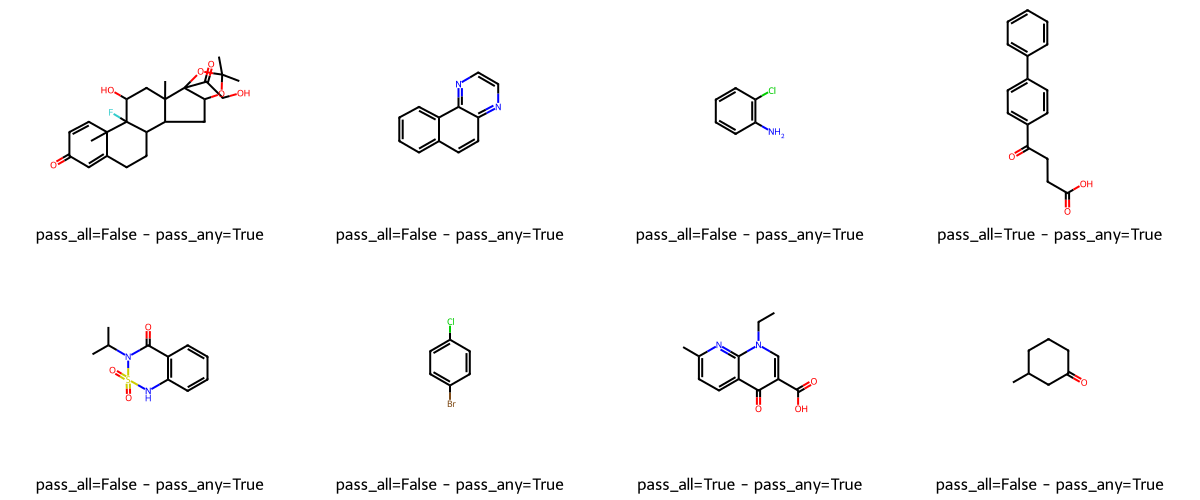

In [59]:
rows = results.iloc[:8]

mols = rows["mol"].iloc[:8].tolist()
legends = rows[["pass_all", "pass_any"]].apply(lambda x: f"pass_all={x[0]} - pass_any={x[1]}", axis=1).tolist()

dm.to_image(mols, legends=legends, mol_size=(300, 250))

## Low level API

You can use the low level API to filter molecules.

List the available rule by their names.

In [60]:
rule_names = mc.rules.RuleFilters.list_available_rules()["name"].tolist()
rule_names

['rule_of_five',
 'rule_of_five_beyond',
 'rule_of_four',
 'rule_of_three',
 'rule_of_three_extended',
 'rule_of_two',
 'rule_of_ghose',
 'rule_of_veber',
 'rule_of_reos',
 'rule_of_chemaxon_druglikeness',
 'rule_of_egan',
 'rule_of_pfizer_3_75',
 'rule_of_gsk_4_400',
 'rule_of_oprea',
 'rule_of_xu',
 'rule_of_cns',
 'rule_of_respiratory',
 'rule_of_zinc',
 'rule_of_leadlike_soft',
 'rule_of_druglike_soft',
 'rule_of_generative_design',
 'rule_of_generative_design_strict']

The rules are available at `mc.rules.basic_rules.*`. You can retrieve a rule with:

- the direct import `mc.rules.basic_rules.rule_of_five`.
- by its name: `getattr(mc.rules.basic_rules, "rule_of_five")`

Let's do it!

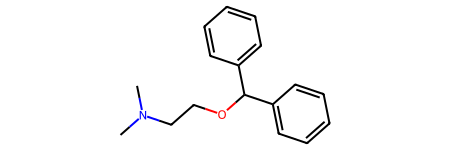

In [61]:
# Get some rules
rule_1 = mc.rules.basic_rules.rule_of_five
rule_2 = getattr(mc.rules.basic_rules, "rule_of_chemaxon_druglikeness")

# Get a molecule
mol = dm.to_mol(" CN(C)CCOC(C1=CC=CC=C1)C1=CC=CC=C1")

mol

In [62]:
# Apply rule #1
rule_1(mol)

True

In [63]:
# Apply rule #2
rule_2(mol)

False